In [1]:
from pathlib import Path

while Path.cwd().name != 'proxy-tuning':
    %cd ..

/mmfs1/gscratch/xlab/alisaliu/proxy-tuning


/gscratch/cse/alisaliu/miniconda3/envs/proxy/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
analysis_dir = Path('analysis/truthfulqa')

In [4]:
dfs = []
metrics = {}
for dir in os.listdir(analysis_dir):
    alpha = float(dir.split('-')[-1][1:])
    if alpha > 2.0:
        continue
    sub_df = pd.read_json(analysis_dir / f'dexperts-13B-a{alpha}/open_results.jsonl', lines=True)
    sub_df['alpha'] = alpha
    sub_df = sub_df[['alpha', 'Type', 'Category', 'Question', 'Best Answer', 'output', 'GPT-true acc', 'GPT-info acc']]
    dfs.append(sub_df)
    
    # metrics
    with open(analysis_dir / f'dexperts-13B-a{alpha}/open_metrics.json', 'rb') as fin:
        sub_metrics = json.load(fin)
    metrics[alpha] = {'info': sub_metrics['GPT-info acc'], 'true': sub_metrics['GPT-true acc']}

In [5]:
metrics

{1.2: {'info': 0.9204406364749081, 'true': 0.9155446756425949},
 0.2: {'info': 0.9290085679314566, 'true': 0.7833537331701347},
 0.8: {'info': 0.9216646266829865, 'true': 0.8800489596083231},
 1.4: {'info': 0.9008567931456548, 'true': 0.9290085679314566},
 1.6: {'info': 0.8824969400244798, 'true': 0.9363525091799265},
 1.0: {'info': 0.9143206854345165, 'true': 0.9045287637698899},
 0.6: {'info': 0.9436964504283966, 'true': 0.8616891064871481},
 1.8: {'info': 0.8776009791921665, 'true': 0.9424724602203183},
 2.0: {'info': 0.8739290085679314, 'true': 0.9547123623011016},
 0.4: {'info': 0.9596083231334149, 'true': 0.8567931456548348}}

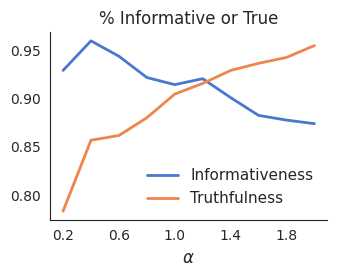

In [6]:
# plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 11})
sns.set_style('white')
fig, ax = plt.subplots(figsize=(3.5,2.9))
ax.tick_params(axis='both', which='major', labelsize=10)
sns.lineplot(x=metrics.keys(), y=[r['info'] for r in metrics.values()], ax=ax, color=sns.color_palette('muted')[0], label='Informativeness', linewidth=2)
sns.lineplot(x=metrics.keys(), y=[r['true'] for r in metrics.values()], ax=ax, color=sns.color_palette('muted')[1], label='Truthfulness', linewidth=2)
ax.set_xlabel(r'$\alpha$', fontsize=12)
ax.set_title('% Informative or True', fontsize=12)
ax.set_xticks([0.2, 0.6, 1. , 1.4, 1.8])
ax.set_yticks([0.8, 0.85, 0.9, 0.95])
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
sns.despine()
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()
plt.savefig('plots/alpha.png', dpi=300)